In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import time

In [2]:
# read data
df = pd.read_csv('EUR_USD Consolidated Data.csv', index_col='Date',parse_dates=['Date'])
df

,Open,High,Low,Close,Adj Close,EUR I/R,US Fed Rate,US Headline CPI,US Core CPI,EUR Headline CPI,EUR Core CPI,US GDP Per Capita,US Current Acc Bal,EUR Current Acc Bal,US Terms of Trade,EU Terms of Trade,EUR Unemployment Rate,US Unemployment Rate
Date,,,,,,,,,,,,,,,,,,
2010-01-01,1.432706,1.440196,1.432706,1.438994,1.438994,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-04,1.431004,1.445191,1.426208,1.442398,1.442398,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-05,1.442710,1.448310,1.435194,1.436596,1.436596,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-06,1.436596,1.443460,1.429123,1.440403,1.440403,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
2010-01-07,1.440300,1.444481,1.430206,1.431803,1.431803,1.75,0.095714,217.488,220.633,92.32,93.52,47797.0,-86832.0,10150.0,92.010,98.649861,9.997619,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,1.090667,1.092180,1.088815,1.090667,1.090667,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6
2023-06-27,1.091048,1.097610,1.090322,1.091048,1.091048,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6
2023-06-28,1.095722,1.096251,1.089966,1.095722,1.095722,4.25,5.071429,303.841,308.309,123.15,119.48,80781.0,-218801.0,77030.0,108.216,96.093069,6.453621,3.6


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,EUR I/R,US Fed Rate,US Headline CPI,US Core CPI,EUR Headline CPI,EUR Core CPI,US GDP Per Capita,US Current Acc Bal,EUR Current Acc Bal,US Terms of Trade,EU Terms of Trade,EUR Unemployment Rate,US Unemployment Rate
count,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000,3516.000000
mean,1.202199,1.206384,1.197765,1.202176,1.202176,0.847341,0.787472,247.774096,252.071185,102.580176,101.835762,60287.866894,-127496.749716,64364.928896,99.047658,98.807984,9.432754,6.006911
std,0.113999,0.114481,0.113623,0.113936,0.113936,0.854795,1.145665,22.084952,23.027558,6.764358,5.722900,8939.387461,51923.643357,43021.177405,5.008845,1.858897,1.752065,2.255497
min,0.959619,0.967006,0.760572,0.959619,0.959619,0.250000,0.045714,217.199000,220.633000,91.570000,92.300000,47797.000000,-258277.000000,-34380.000000,91.603000,96.093069,6.400128,3.400000
25%,1.112489,1.116000,1.108540,1.112520,1.112520,0.250000,0.090000,232.445000,232.996000,98.830000,98.050000,52816.000000,-133695.000000,33220.000000,94.295000,96.755555,7.861542,4.000000
50%,1.176416,1.179272,1.172828,1.176325,1.176325,0.300000,0.157143,241.176000,248.842000,100.685000,101.000000,58144.000000,-107374.000000,67930.000000,99.554000,99.649867,9.890301,5.300000
75%,1.306033,1.310099,1.300845,1.305905,1.305905,1.500000,1.160000,257.803000,265.924000,105.130000,105.060000,65473.000000,-92852.000000,102570.000000,101.916000,100.191851,10.932347,7.800000
max,1.484296,1.493808,1.480494,1.484406,1.484406,4.250000,5.080000,303.841000,308.309000,123.470000,119.910000,80781.000000,-69195.000000,139730.000000,109.384000,101.739967,12.185582,14.700000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3516 entries, 2010-01-01 to 2023-06-30
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   3516 non-null   float64
 1   High                   3516 non-null   float64
 2   Low                    3516 non-null   float64
 3   Close                  3516 non-null   float64
 4   Adj Close              3516 non-null   float64
 5   EUR I/R                3516 non-null   float64
 6   US Fed Rate            3516 non-null   float64
 7   US Headline CPI        3516 non-null   float64
 8   US Core CPI            3516 non-null   float64
 9   EUR Headline CPI       3516 non-null   float64
 10  EUR Core CPI           3516 non-null   float64
 11  US GDP Per Capita      3516 non-null   float64
 12  US Current Acc Bal     3516 non-null   float64
 13  EUR Current Acc Bal    3516 non-null   float64
 14  US Terms of Trade      3516 non-null  

In [5]:
rates = df[['Adj Close']]
rates

,Adj Close
Date,
2010-01-01,1.438994
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


In [6]:
rates.rename(columns={'Adj Close':'Rates'},inplace=True)
rates

/var/folders/ps/ypptn4xx5858gdv_767yb6vh0000gn/T/ipykernel_50168/2820750488.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rates
Date,
2010-01-01,1.438994
2010-01-04,1.442398
2010-01-05,1.436596
2010-01-06,1.440403
2010-01-07,1.431803
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


<Axes: xlabel='Date', ylabel='Rates'>

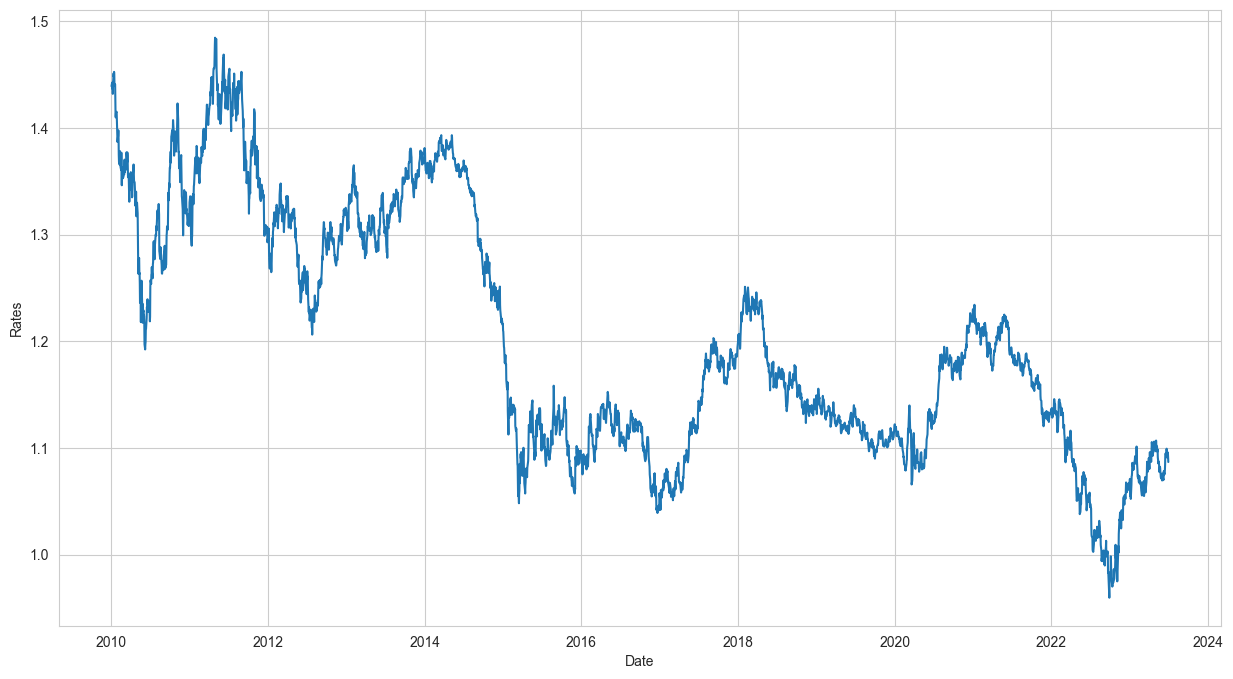

In [7]:
# plot time series
plt.figure(figsize=(15,8))
sns.lineplot(x=rates.index, y=rates.Rates)

/var/folders/ps/ypptn4xx5858gdv_767yb6vh0000gn/T/ipykernel_50168/3021821421.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date', ylabel='Log Return'>

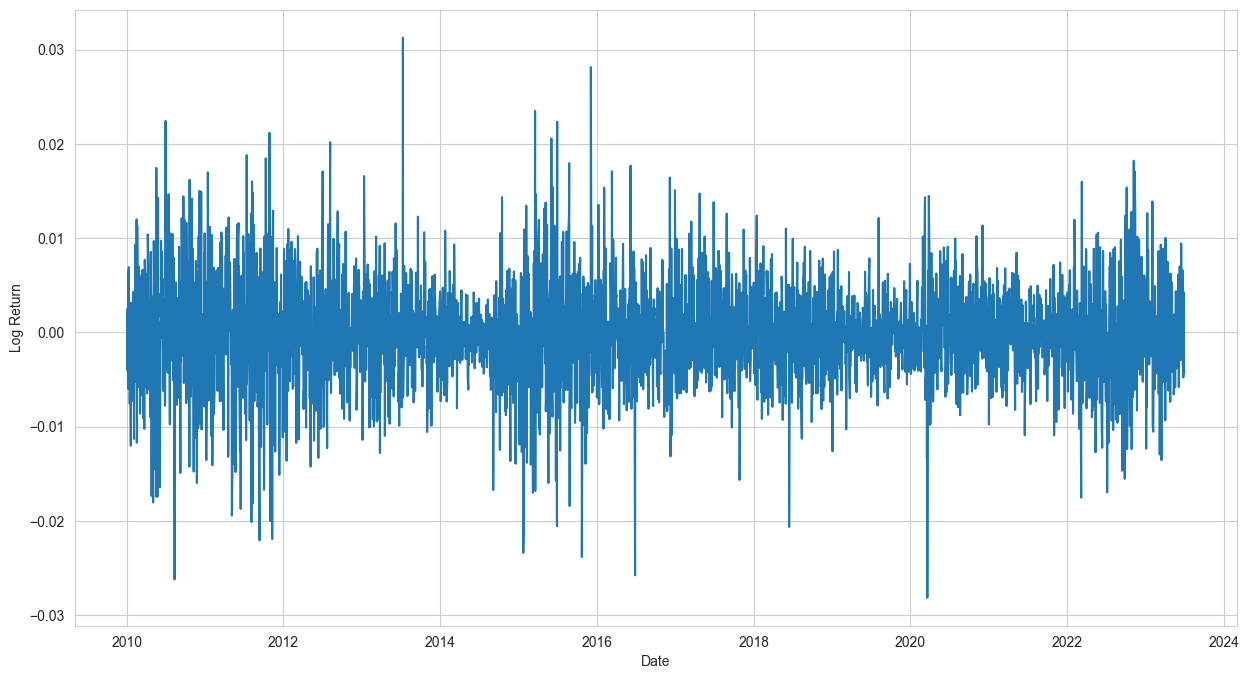

In [8]:
# plot log returns
rates['Log Return'] = np.log(rates.Rates / rates.Rates.shift())
plt.figure(figsize=(15,8))
sns.lineplot(x=rates.index, y=rates['Log Return'])

<Figure size 1500x800 with 0 Axes>

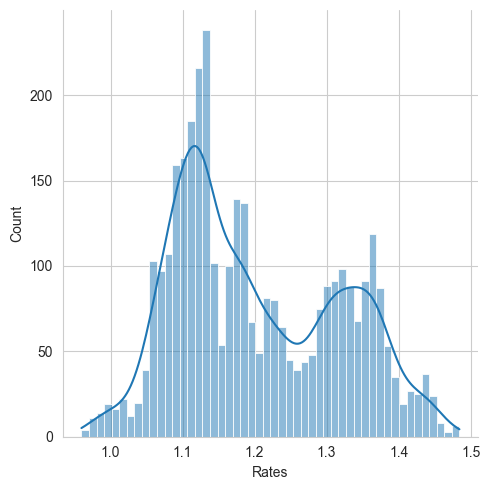

In [9]:
# plot distplot
plt.figure(figsize=(15,8))
sns.displot(rates.Rates, bins=50, kde=True)

/var/folders/ps/ypptn4xx5858gdv_767yb6vh0000gn/T/ipykernel_50168/2547389861.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Log Return', ylabel='Density'>

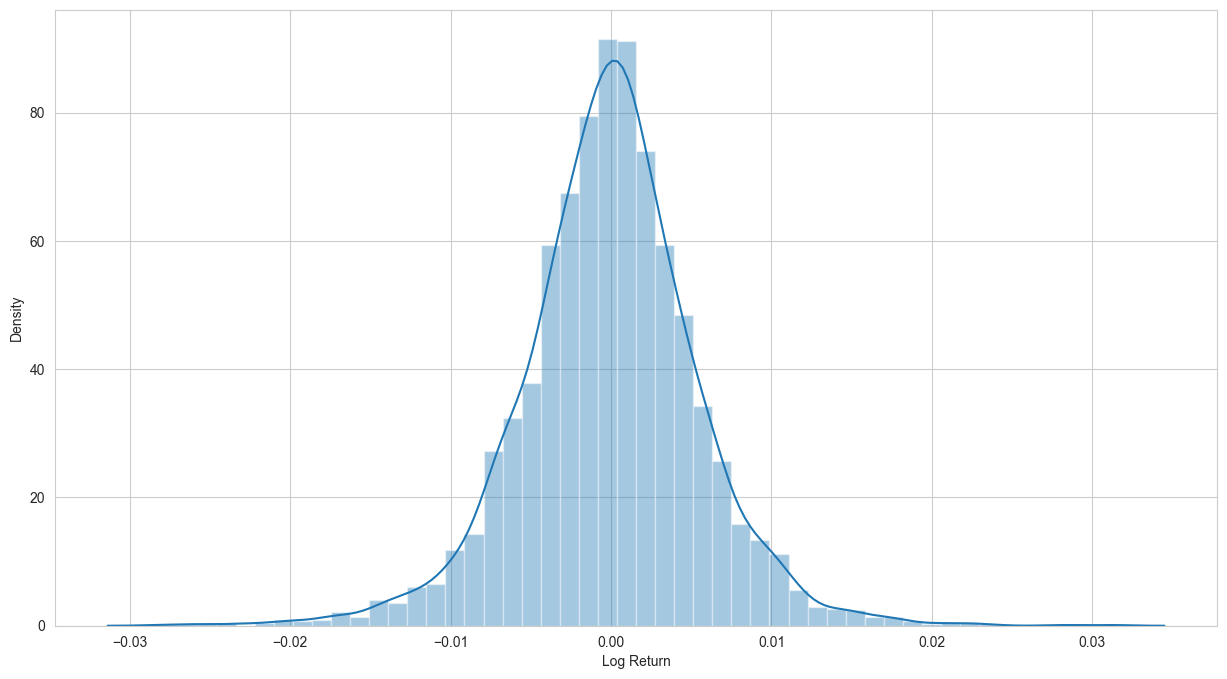

In [10]:
plt.figure(figsize=(15,8))
sns.distplot(rates['Log Return'], bins=50, kde=True)

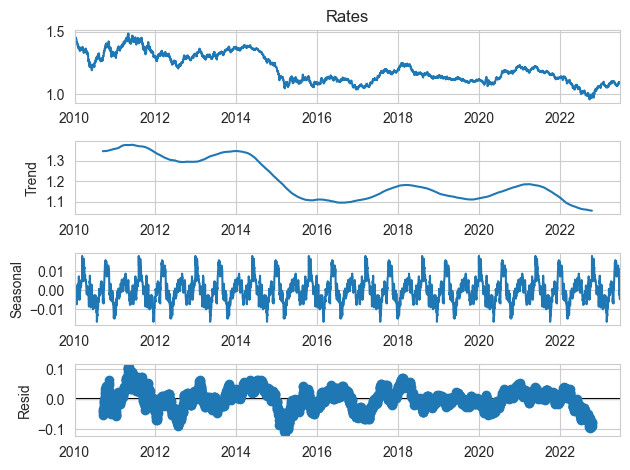

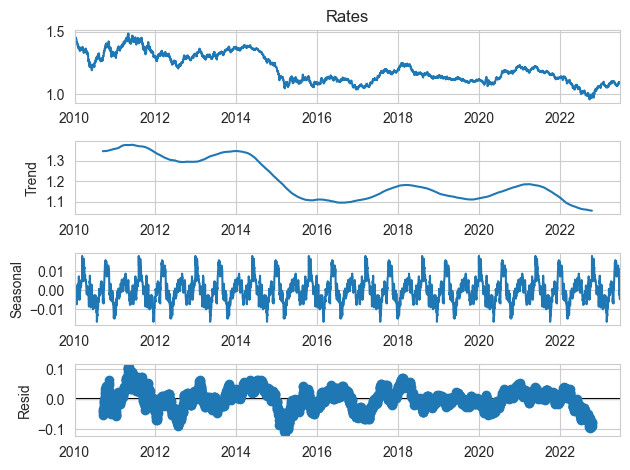

In [12]:
# decompose the dataset for seasonality
# additive since there is no exponential decrease
seasonality_decomposition = seasonal_decompose(rates['Rates'], model='additive',period=365)
seasonality_decomposition.plot()

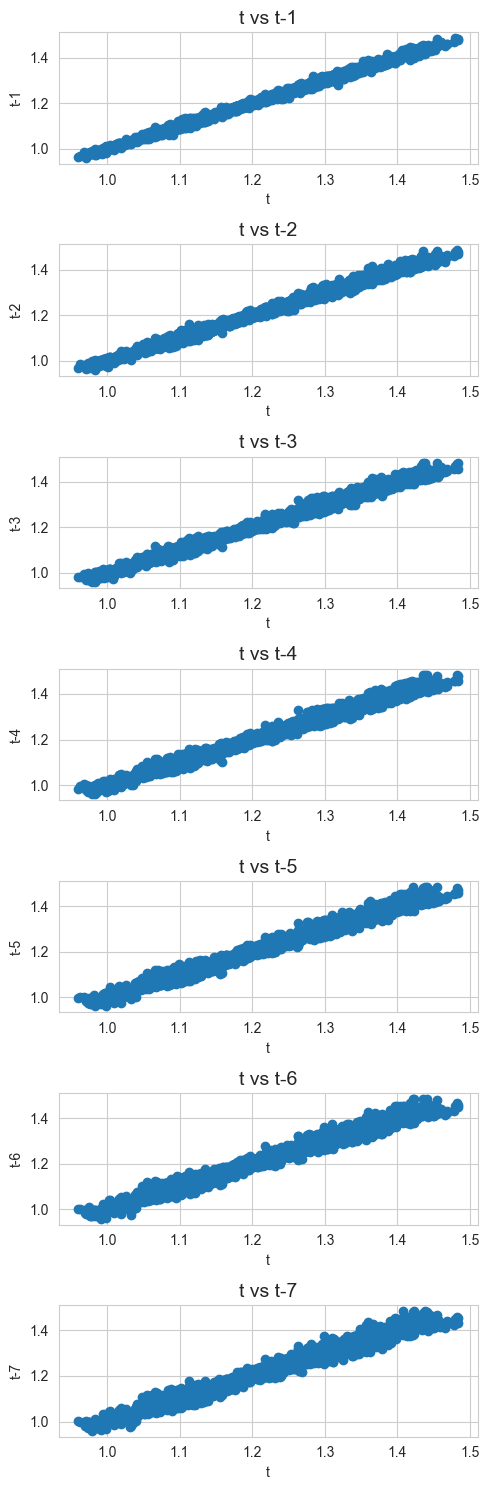

In [13]:
# Create a DataFrame from the 'Rates' values
values = rates['Rates']

# Number of lags
lags = 7

# Create lagged structure
dataframe = pd.concat([values.shift(i) for i in range(lags + 1)], axis=1)
dataframe.columns = ['t-' + str(i) for i in range(lags + 1)]

# Plotting
fig, axes = plt.subplots(nrows=lags, ncols=1, figsize=(5, 15))
for i in range(1, lags + 1):
    axes[i-1].scatter(x=dataframe['t-0'], y=dataframe['t-' + str(i)])
    axes[i-1].set_title('t vs t-' + str(i), family='Arial', fontsize=14)
    axes[i-1].set_xlabel('t')
    axes[i-1].set_ylabel('t-' + str(i))

plt.tight_layout()
plt.show()

For above:
For a period of 7 lags, there is a strong positive correlation between the values, this could suggest non-stationarity due to possible trend or some form of autoregressive process. We will perform the ADF Test to test stationarity.

In [14]:
result = adfuller(rates['Rates'])
print('ADF Statistic: %f' % result[0])
print('p-value %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.155107
p-value 0.222940
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


For above:
ADF Statistics sits at -2.1551, which is bigger than our critical value at 5%, we cannot reject the null hypothesis that the time series has a unit root, implying it is non-stationary (supporting the above lag analysis that there could be a trend)

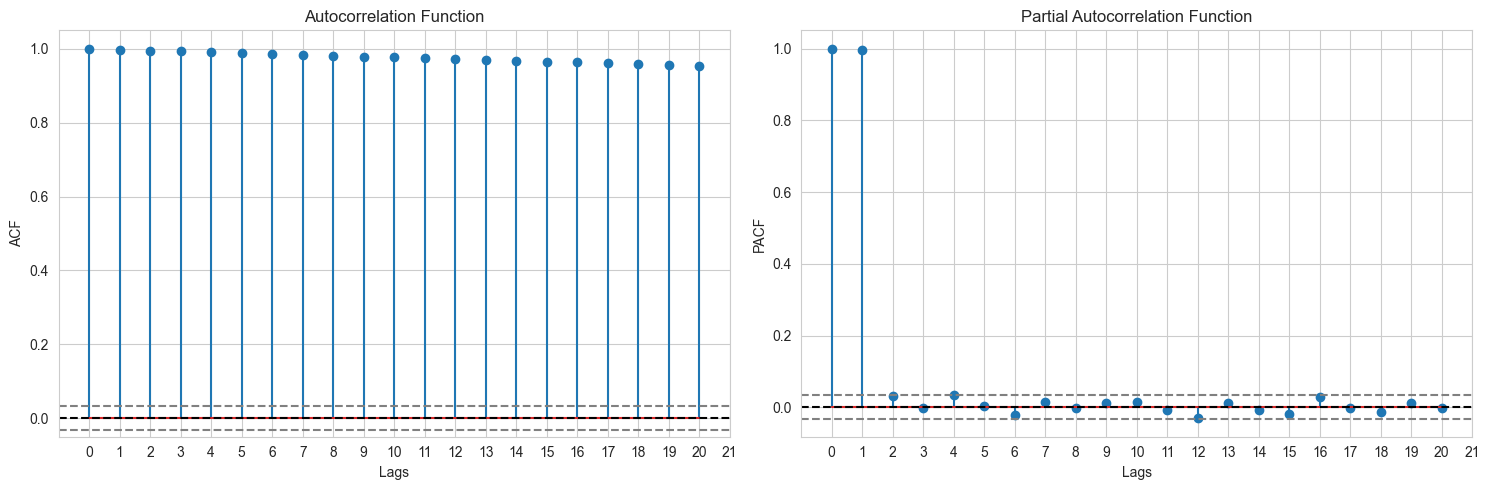

In [15]:
# Calculate ACF and PACF
lag_acf = acf(rates["Rates"], nlags=20)
lag_pacf = pacf(rates['Rates'], nlags=20, method='ols')

# Set up the figure
plt.figure(figsize=(15,5))

# Data and titles for the two subplots
plots = [(lag_acf, 'ACF', 'Autocorrelation Function'), 
         (lag_pacf, 'PACF', 'Partial Autocorrelation Function')]

# Loop to plot ACF and PACF
for i, (data, ylabel, title) in enumerate(plots, 1):
    plt.subplot(1, 2, i)
    plt.stem(data)
    plt.axhline(y=0, linestyle='--', color='black')
    plt.axhline(y=-1.96/np.sqrt(len(rates)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(rates)), linestyle='--', color='gray')
    plt.xticks(range(0, 22, 1))
    plt.xlabel('Lags')
    plt.ylabel(ylabel)
    plt.title(title)

plt.tight_layout()
plt.show()

For above:
A gradual decay in ACF suggests that there is strong correlation in the series over many lags, indicative of non-stationarity. A sharp cut-off in PACF after lag 2 suggests that the correlation between an observation and its third lag can be explained entirely by their correlations with the first two lags. This is characteristic behaviour of an AR(2) process. 

To make the data stationary, we will difference the data once first.

In [16]:
differenced_rates = rates.diff()
differenced_rates.dropna(inplace=True)
differenced_rates

,Rates,Log Return
Date,,
2010-01-05,-0.005802,-0.006393
2010-01-06,0.003807,0.006677
2010-01-07,-0.008600,-0.008635
2010-01-08,0.009306,0.012467
2010-01-11,0.010017,0.000448
...,...,...
2023-06-26,-0.005223,-0.001703
2023-06-27,0.000381,0.005127
2023-06-28,0.004674,0.003926


<Axes: xlabel='Date', ylabel='Rates'>

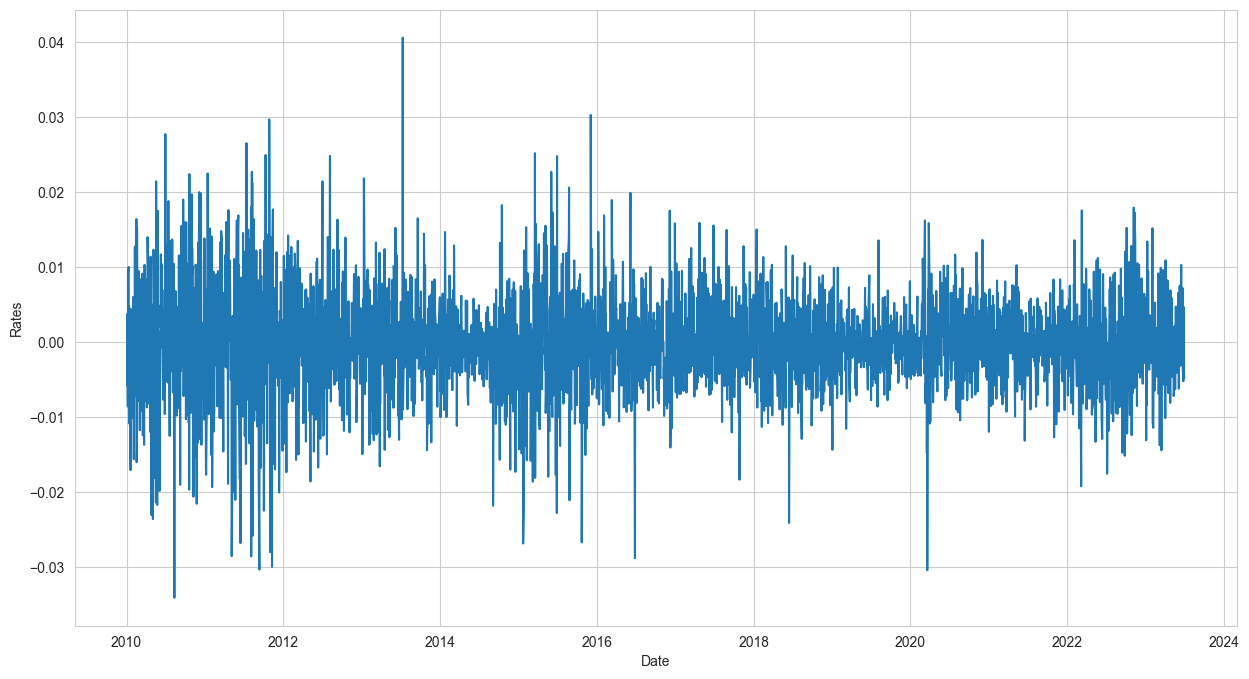

In [17]:
plt.figure(figsize=(15,8))
sns.lineplot(x=differenced_rates.index, y=differenced_rates.Rates)

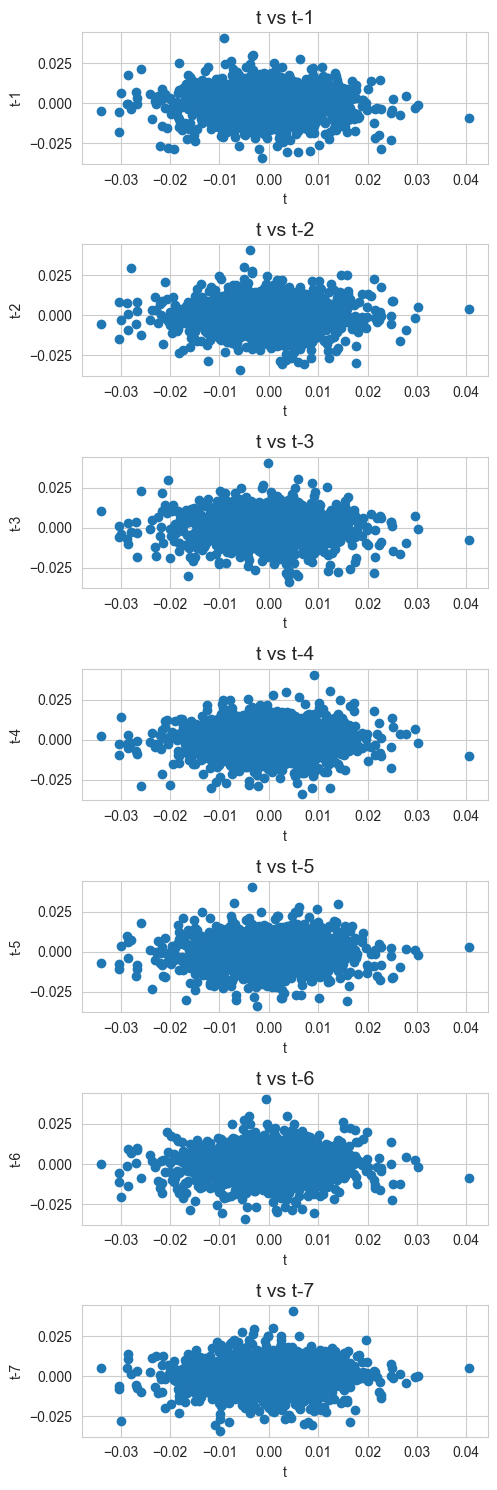

In [18]:
# Create a DataFrame from the 'Rates' values
values_1 = differenced_rates['Rates']

# Number of lags
lags = 7

# Create lagged structure
dataframe_1 = pd.concat([values_1.shift(i) for i in range(lags + 1)], axis=1)
dataframe_1.columns = ['t-' + str(i) for i in range(lags + 1)]

# Plotting
fig, axes = plt.subplots(nrows=lags, ncols=1, figsize=(5, 15))
for i in range(1, lags + 1):
    axes[i-1].scatter(x=dataframe_1['t-0'], y=dataframe_1['t-' + str(i)])
    axes[i-1].set_title('t vs t-' + str(i), family='Arial', fontsize=14)
    axes[i-1].set_xlabel('t')
    axes[i-1].set_ylabel('t-' + str(i))

plt.tight_layout()
plt.show()

For above:
As it seems, the lags are not correlated and seems to be spread out, thus this could imply that the data is now stationary. 

We will perform ADF Test to verify.

In [19]:
new_result = adfuller(differenced_rates['Rates'])
print('ADF Statistic: %f' % new_result[0])
print('p-value %f' % new_result[1])
print('Critical Values:')

for key, value in new_result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -35.716891
p-value 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


For above:
With ADF Statistics sitting at -35.7169, it is smaller than the critical values at 5%, thus we have sufficient evidence to reject the null hypothesis of the presence of unit root. The data is now stationary as we have strong evidence against the presence of a unit root. The series does not exhibit a trend or seasonality.

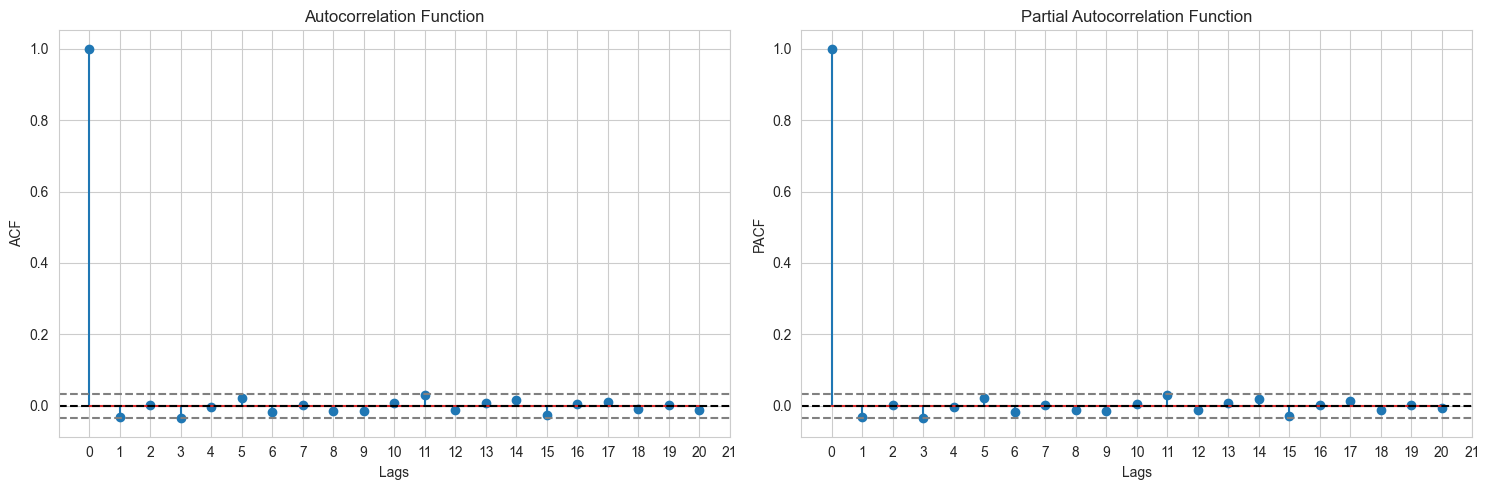

In [20]:
# Calculate ACF and PACF
lag_acf = acf(differenced_rates["Rates"], nlags=20)
lag_pacf = pacf(differenced_rates['Rates'], nlags=20, method='ols')

# Set up the figure
plt.figure(figsize=(15,5))

# Data and titles for the two subplots
plots = [(lag_acf, 'ACF', 'Autocorrelation Function'), 
         (lag_pacf, 'PACF', 'Partial Autocorrelation Function')]

# Loop to plot ACF and PACF
for i, (data, ylabel, title) in enumerate(plots, 1):
    plt.subplot(1, 2, i)
    plt.stem(data)
    plt.axhline(y=0, linestyle='--', color='black')
    plt.axhline(y=-1.96/np.sqrt(len(differenced_rates)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(differenced_rates)), linestyle='--', color='gray')
    plt.xticks(range(0, 22, 1))
    plt.xlabel('Lags')
    plt.ylabel(ylabel)
    plt.title(title)

plt.tight_layout()
plt.show()

For above:
We can see that for both ACF and PACF, there seems to be no correlation with previous values. From the above data, the AR and MA order for our ARIMA model be 1 and 1 respectively. The differencing order would also be 1, thus would ARIMA model would be (1,1,1).

In [21]:
rates.describe()

,Rates,Log Return
count,3516.000000,3515.000000
mean,1.202176,-0.000080
std,0.113936,0.005512
min,0.959619,-0.028144
25%,1.112520,-0.003197
50%,1.176325,0.000000
75%,1.305905,0.002999
max,1.484406,0.031262


In [22]:
# train test split for the data. First 80% of data will be train, last 20% of data will be test.

rates.drop('Log Return', axis=1, inplace=True)
train = rates['Rates'][:2124]
test = rates['Rates'][2124:]

/var/folders/ps/ypptn4xx5858gdv_767yb6vh0000gn/T/ipykernel_50168/355026104.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
model = ARIMA(train, order=(1,1,1), trend='n')
arima_result = model.fit()
arima_result.summary()

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Rates   No. Observations:                 2124
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7349.826
Date:                Wed, 25 Oct 2023   AIC                         -14693.651
Time:                        11:53:55   BIC                         -14676.669
Sample:                             0   HQIC                        -14687.435
                               - 2124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4401      0.316     -1.393      0.164      -1.059       0.179
ma.L1          0.3955      0.324      1.220      0.222      -0.240       1.031
sigma2       5.76e-05   1.28e-06     44.838      0.000    5.51e-05    6.01e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               287.24
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

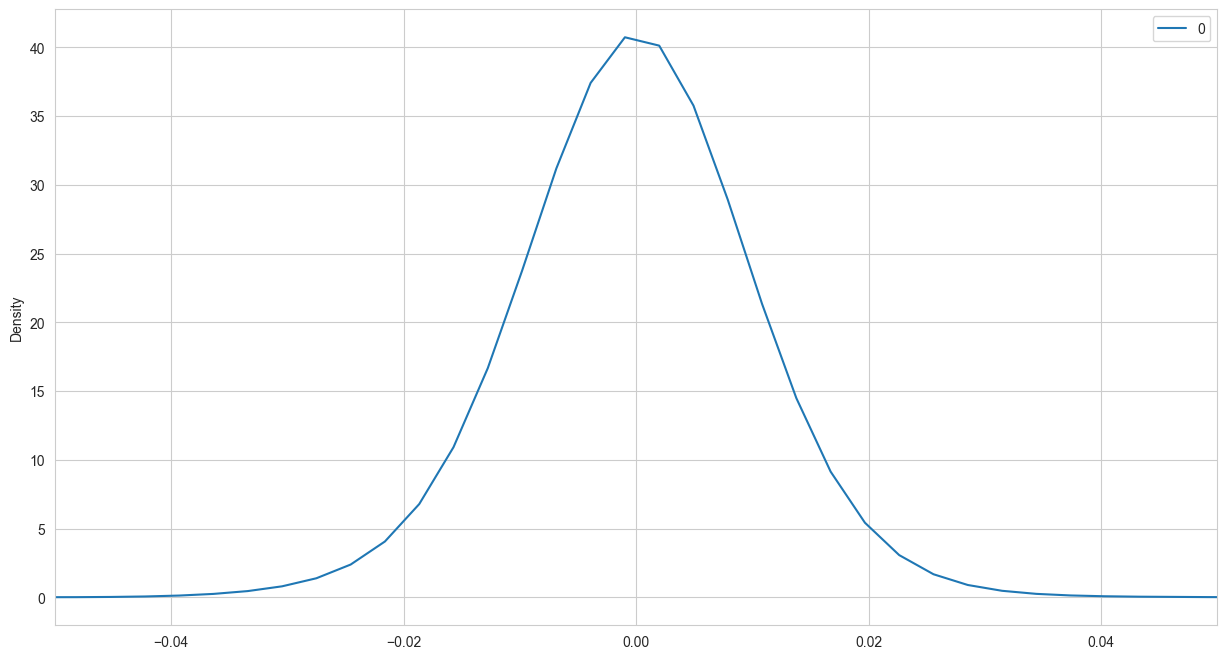

In [24]:
# checking residual distribution
arima_residuals = pd.DataFrame(arima_result.resid)
arima_residuals.plot(kind='kde', figsize=(15,8))
plt.xlim(-0.05,0.05)
plt.show()

 predicted=1.231322, expected=1.223032 
 predicted=1.223511, expected=1.219126 
 predicted=1.219108, expected=1.227084 
 predicted=1.226728, expected=1.231542 
 predicted=1.231478, expected=1.233654 
 predicted=1.233584, expected=1.241665 
 predicted=1.241338, expected=1.241465 
 predicted=1.241604, expected=1.230663 
 predicted=1.231093, expected=1.230875 
 predicted=1.230705, expected=1.233958 
 predicted=1.233882, expected=1.239234 
 predicted=1.239028, expected=1.237562 
 predicted=1.237711, expected=1.230921 
 predicted=1.231162, expected=1.228079 
 predicted=1.228118, expected=1.233685 
 predicted=1.233423, expected=1.225190 
 predicted=1.225660, expected=1.234766 
 predicted=1.234164, expected=1.232499 
 predicted=1.232819, expected=1.235437 
 predicted=1.235184, expected=1.245749 
 predicted=1.245373, expected=1.240787 
 predicted=1.241147, expected=1.231027 
 predicted=1.231352, expected=1.230285 
 predicted=1.230212, expected=1.231421 
 predicted=1.231394, expected=1.229271 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.163036, expected=1.158856 
 predicted=1.159057, expected=1.157903 
 predicted=1.157894, expected=1.160578 
 predicted=1.160460, expected=1.166140 
 predicted=1.165921, expected=1.170275 
 predicted=1.170147, expected=1.165026 
 predicted=1.165294, expected=1.156363 
 predicted=1.156683, expected=1.156297 
 predicted=1.156222, expected=1.167856 
 predicted=1.167356, expected=1.164212 
 predicted=1.164482, expected=1.165922 
 predicted=1.165786, expected=1.166235 
 predicted=1.166250, expected=1.169591 
 predicted=1.169437, expected=1.175226 
 predicted=1.175008, expected=1.175696 
 predicted=1.175723, expected=1.172704 
 predicted=1.172832, expected=1.167679 
 predicted=1.167875, expected=1.166589 
 predicted=1.166595, expected=1.167910 
 predicted=1.167850, expected=1.170946 
 predicted=1.170824, expected=1.165325 
 predicted=1.165602, expected=1.164565 
 predicted=1.164540, expected=1.165515 
 predicted=1.165478, expected=1.174191 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.173813, expected=1.169413 
 predicted=1.169705, expected=1.168552 
 predicted=1.168531, expected=1.173750 
 predicted=1.173520, expected=1.164293 
 predicted=1.164765, expected=1.166045 
 predicted=1.165874, expected=1.170741 
 predicted=1.170558, expected=1.168962 
 predicted=1.169075, expected=1.166589 
 predicted=1.166677, expected=1.158601 
 predicted=1.158946, expected=1.156230 
 predicted=1.156273, expected=1.155802 
 predicted=1.155813, expected=1.160295 
 predicted=1.160091, expected=1.161076 
 predicted=1.161078, expected=1.152392 
 predicted=1.152783, expected=1.139471 
 predicted=1.139973, expected=1.140251 
 predicted=1.140129, expected=1.134572 
 predicted=1.134848, expected=1.134430 
 predicted=1.134382, expected=1.137139 
 predicted=1.137028, expected=1.143772 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.143502, expected=1.149135 
 predicted=1.148955, expected=1.157675 
 predicted=1.157344, expected=1.158480 
 predicted=1.158519, expected=1.154335 
 predicted=1.154506, expected=1.164890 
 predicted=1.164394, expected=1.168361 
 predicted=1.168313, expected=1.169126 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.169103, expected=1.170974 
 predicted=1.170899, expected=1.166466 
 predicted=1.166677, expected=1.160106 
 predicted=1.160336, expected=1.161548 
 predicted=1.161438, expected=1.158655 
 predicted=1.158803, expected=1.163521 
 predicted=1.163279, expected=1.162007 
 predicted=1.162125, expected=1.156109 
 predicted=1.156340, expected=1.159595 
 predicted=1.159397, expected=1.159608 
 predicted=1.159648, expected=1.162926 
 predicted=1.162774, expected=1.169180 
 predicted=1.168942, expected=1.162899 
 predicted=1.163220, expected=1.166916 
 predicted=1.166675, expected=1.167992 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.167994, expected=1.167461 
 predicted=1.167484, expected=1.177593 
 predicted=1.177146, expected=1.175102 
 predicted=1.175302, expected=1.175295 
 predicted=1.175246, expected=1.176318 
 predicted=1.176283, expected=1.174853 
 predicted=1.174924, expected=1.163738 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.164210, expected=1.160537 
 predicted=1.160581, expected=1.157756 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.157868, expected=1.155175 
 predicted=1.155262, expected=1.147631 
 predicted=1.147936, expected=1.151808 
 predicted=1.151560, expected=1.152260 
 predicted=1.152294, expected=1.149412 
 predicted=1.149528, expected=1.150695 
 predicted=1.150615, expected=1.153336 
 predicted=1.153239, expected=1.159044 
 predicted=1.158818, expected=1.155135 
 predicted=1.155352, expected=1.158346 
 predicted=1.158160, expected=1.157528 
 predicted=1.157604, expected=1.150086 
 predicted=1.150394, expected=1.146000 
 predicted=1.146112, expected=1.150947 
 predicted=1.150710, expected=1.146789 
 predicted=1.147018, expected=1.147315 
 predicted=1.147246, expected=1.139926 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.140263, expected=1.137786 
 predicted=1.137807, expected=1.139874 
 predicted=1.139779, expected=1.137618 
 predicted=1.137736, expected=1.134636 
 predicted=1.134741, expected=1.131670 
 predicted=1.131776, expected=1.140329 
 predicted=1.139931, expected=1.139757 
 predicted=1.139862, expected=1.141292 
 predicted=1.141203, expected=1.143851 
 predicted=1.143758, expected=1.143406 
 predicted=1.143444, expected=1.136842 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.137120, expected=1.132503 
 predicted=1.132635, expected=1.123343 
 predicted=1.123708, expected=1.131119 
 predicted=1.130704, expected=1.131183 
 predicted=1.131267, expected=1.132490 
 predicted=1.132415, expected=1.141396 
 predicted=1.141026, expected=1.145502 
 predicted=1.145405, expected=1.137242 
 predicted=1.137620, expected=1.138835 
 predicted=1.138693, expected=1.140316 
 predicted=1.140278, expected=1.133735 
 predicted=1.134028, expected=1.133337 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.133301, expected=1.129880 
 predicted=1.130037, expected=1.136855 
 predicted=1.136521, expected=1.139277 
 predicted=1.139234, expected=1.134224 
 predicted=1.134452, expected=1.135486 
 predicted=1.135391, expected=1.134288 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.134357, expected=1.134906 
 predicted=1.134867, expected=1.137475 
 predicted=1.137370, expected=1.140095 
 predicted=1.140000, expected=1.135654 
 predicted=1.135864, expected=1.132311 
 predicted=1.132420, expected=1.137346 
 predicted=1.137108, expected=1.136364 
 predicted=1.136446, expected=1.130595 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.130834, expected=1.134984 
 predicted=1.134755, expected=1.137540 
 predicted=1.137462, expected=1.138952 
 predicted=1.138902, expected=1.145685 
 predicted=1.145399, expected=1.137281 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.137695, expected=1.140394 
 predicted=1.140192, expected=1.141553 
 predicted=1.141532, expected=1.136131 
 predicted=1.136374, expected=1.143105 
 predicted=1.142759, expected=1.143995 
 predicted=1.144005, expected=1.149306 
 predicted=1.149068, expected=1.146171 
 predicted=1.146347, expected=1.131811 
 predicted=1.132424, expected=1.139108 
 predicted=1.138703, expected=1.141044 
 predicted=1.141002, expected=1.147974 
 predicted=1.147668, expected=1.145607 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.145753, expected=1.155495 
 predicted=1.155028, expected=1.151013 
 predicted=1.151286, expected=1.146014 
 predicted=1.146204, expected=1.147289 
 predicted=1.147206, expected=1.141683 
 predicted=1.141948, expected=1.139809 
 predicted=1.139857, expected=1.139264 
 predicted=1.139282, expected=1.136557 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.136677, expected=1.136932 
 predicted=1.136898, expected=1.136402 
 predicted=1.136431, expected=1.138822 
 predicted=1.138709, expected=1.131350 
 predicted=1.131705, expected=1.141305 
 predicted=1.140796, expected=1.143001 
 predicted=1.142995, expected=1.143537 
 predicted=1.143513, expected=1.148765 
 predicted=1.148530, expected=1.144951 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.145160, expected=1.145528 
 predicted=1.145471, expected=1.143628 
 predicted=1.143723, expected=1.140993 
 predicted=1.141100, expected=1.136596 
 predicted=1.136781, expected=1.133877 
 predicted=1.133973, expected=1.132426 
 predicted=1.132477, expected=1.127904 
 predicted=1.128101, expected=1.133466 
 predicted=1.133181, expected=1.126494 
 predicted=1.126861, expected=1.129535 
 predicted=1.129334, expected=1.129803 
 predicted=1.129824, expected=1.131196 
 predicted=1.131128, expected=1.134301 
 predicted=1.134169, expected=1.134636 
 predicted=1.134642, expected=1.134301 
 predicted=1.134315, expected=1.134224 
 predicted=1.134225, expected=1.136751 
 predicted=1.136635, expected=1.139315 
 predicted=1.139217, expected=1.138019 
 predicted=1.138095, expected=1.137346 
 predicted=1.137364, expected=1.137592 
 predicted=1.137578, expected=1.133735 
 predicted=1.133915, expected=1.130710 
 predicted=1.130819, expected=1.131401 
 predicted=1.131351, expected=1.119833 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.128629, expected=1.133106 
 predicted=1.132925, expected=1.130838 
 predicted=1.130973, expected=1.131977 
 predicted=1.131902, expected=1.133620 
 predicted=1.133557, expected=1.135486 
 predicted=1.135411, expected=1.142792 
 predicted=1.142470, expected=1.137501 
 predicted=1.137800, expected=1.129586 
 predicted=1.129904, expected=1.131580 
 predicted=1.131440, expected=1.127485 
 predicted=1.127696, expected=1.125176 
 predicted=1.125249, expected=1.123002 
 predicted=1.123090, expected=1.122385 
 predicted=1.122399, expected=1.120574 
 predicted=1.120655, expected=1.120385 
 predicted=1.120381, expected=1.124695 
 predicted=1.124498, expected=1.122586 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.122715, expected=1.121957 
 predicted=1.121965, expected=1.125644 
 predicted=1.125473, expected=1.126697 
 predicted=1.126675, expected=1.127650 
 predicted=1.127610, expected=1.126075 
 predicted=1.126154, expected=1.130506 
 predicted=1.130290, expected=1.130493 
 predicted=1.130528, expected=1.128503 
 predicted=1.128589, expected=1.129714 
 predicted=1.129645, expected=1.123595 
 predicted=1.123888, expected=1.124455 
 predicted=1.124369, expected=1.125898 
 predicted=1.125845, expected=1.122435 
 predicted=1.122603, expected=1.115349 
 predicted=1.115649, expected=1.113685 
 predicted=1.113715, expected=1.115026 
 predicted=1.114960, expected=1.118518 
 predicted=1.118368, expected=1.121604 
 predicted=1.121486, expected=1.120084 
 predicted=1.120172, expected=1.117356 
 predicted=1.117468, expected=1.118581 
 predicted=1.118508, expected=1.120185 
 predicted=1.120122, expected=1.119107 
 predicted=1.119166, expected=1.119833 
 predicted=1.119791, expected=1.122208 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.122096, expected=1.117144 
 predicted=1.117361, expected=1.116196 
 predicted=1.116203, expected=1.119799 
 predicted=1.119638, expected=1.115474 
 predicted=1.115691, expected=1.111321 
 predicted=1.111472, expected=1.111111 
 predicted=1.111097, expected=1.111667 
 predicted=1.111645, expected=1.113573 
 predicted=1.113492, expected=1.113090 
 predicted=1.113124, expected=1.115400 
 predicted=1.115293, expected=1.113958 
 predicted=1.114038, expected=1.109459 
 predicted=1.109646, expected=1.109693 
 predicted=1.109654, expected=1.108561 
 predicted=1.108617, expected=1.109644 
 predicted=1.109588, expected=1.105522 
 predicted=1.105713, expected=1.102536 
 predicted=1.102639, expected=1.101977 
 predicted=1.101986, expected=1.102256 
 predicted=1.102242, expected=1.101686 
 predicted=1.101713, expected=1.102913 
 predicted=1.102855, expected=1.108979 
 predicted=1.108720, expected=1.106293 
 predicted=1.106451, expected=1.104728 
 predicted=1.104774, expected=1.100231 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.100423, expected=1.098298 
 predicted=1.098354, expected=1.094931 
 predicted=1.095070, expected=1.091346 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.091481, expected=1.091941 
 predicted=1.091893, expected=1.087595 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.087794, expected=1.084599 
 predicted=1.084697, expected=1.084175 
 predicted=1.084177, expected=1.084011 
 predicted=1.084018, expected=1.079540 
 predicted=1.079735, expected=1.081010 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.080913, expected=1.078800 
 predicted=1.078913, expected=1.083905 
 predicted=1.083661, expected=1.084920 
 predicted=1.084917, expected=1.088200 
 predicted=1.088056, expected=1.088589 
 predicted=1.088597, expected=1.099723 
 predicted=1.099234, expected=1.105131 
 predicted=1.104989, expected=1.114405 
 predicted=1.114036, expected=1.118068 
 predicted=1.117998, expected=1.113908 
 predicted=1.114102, expected=1.122385 
 predicted=1.121977, expected=1.138602 
 predicted=1.138007, expected=1.139796 
 predicted=1.139876, expected=1.131651 
 predicted=1.131981, expected=1.126152 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.126320, expected=1.118493 
 predicted=1.118775, expected=1.115536 
 predicted=1.115597, expected=1.116321 
 predicted=1.116276, expected=1.101552 
 predicted=1.102167, expected=1.096155 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.096236, expected=1.065735 
 predicted=1.066921, expected=1.069439 
 predicted=1.068849, expected=1.076461 
 predicted=1.076339, expected=1.080264 
 predicted=1.080150, expected=1.088957 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.088659, expected=1.104826 
 predicted=1.104331, expected=1.113908 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.113770, expected=1.103047 
 predicted=1.103511, expected=1.102657 
 predicted=1.102511, expected=1.095362 
 predicted=1.095693, expected=1.084740 
 predicted=1.085004, expected=1.080696 
 predicted=1.080742, expected=1.080380 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.080373, expected=1.089514 
 predicted=1.089185, expected=1.086366 
 predicted=1.086609, expected=1.092741 
 predicted=1.092407, expected=1.093267 
 predicted=1.093382, expected=1.092299 
 predicted=1.092289, expected=1.098539 
 predicted=1.098314, expected=1.090510 
 predicted=1.090897, expected=1.085847 
 predicted=1.085869, expected=1.086697 
 predicted=1.086657, expected=1.086484 
 predicted=1.086507, expected=1.085647 
 predicted=1.085669, expected=1.080964 
 predicted=1.081127, expected=1.077702 
 predicted=1.077758, expected=1.082368 
 predicted=1.082175, expected=1.082485 
 predicted=1.082554, expected=1.083658 
 predicted=1.083588, expected=1.087725 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.087603, expected=1.094547 
 predicted=1.094345, expected=1.095963 
 predicted=1.095990, expected=1.090429 
 predicted=1.090621, expected=1.083858 
 predicted=1.084023, expected=1.079855 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.079935, expected=1.083717 
 predicted=1.083546, expected=1.083952 
 predicted=1.084009, expected=1.080941 
 predicted=1.081028, expected=1.084681 
 predicted=1.084513, expected=1.082368 
 predicted=1.082516, expected=1.080696 
 predicted=1.080701, expected=1.082134 
 predicted=1.082080, expected=1.091512 
 predicted=1.091194, expected=1.092777 
 predicted=1.092851, expected=1.098298 
 predicted=1.098068, expected=1.095290 
 predicted=1.095489, expected=1.090780 
 predicted=1.090866, expected=1.090300 
 predicted=1.090284, expected=1.098177 
 predicted=1.097900, expected=1.101686 
 predicted=1.101665, expected=1.107911 
 predicted=1.107696, expected=1.111852 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.111800, expected=1.112595 
 predicted=1.112590, expected=1.118944 
 predicted=1.118722, expected=1.123595 
 predicted=1.123524, expected=1.133787 
 predicted=1.133462, expected=1.131952 
 predicted=1.132160, expected=1.130557 
 predicted=1.130515, expected=1.133222 
 predicted=1.133147, expected=1.136544 
 predicted=1.136461, expected=1.128808 
 predicted=1.129114, expected=1.125201 
 predicted=1.125197, expected=1.133774 
 predicted=1.133472, expected=1.126570 
 predicted=1.126946, expected=1.124290 
 predicted=1.124225, expected=1.121100 
 predicted=1.121240, expected=1.117756 
 predicted=1.117817, expected=1.127968 
 predicted=1.127581, expected=1.131235 
 predicted=1.131270, expected=1.125087 
 predicted=1.125295, expected=1.122208 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.122234, expected=1.122586 
 predicted=1.122563, expected=1.124720 
 predicted=1.124653, expected=1.123595 
 predicted=1.123659, expected=1.125138 
 predicted=1.125061, expected=1.123785 
 predicted=1.123861, expected=1.124720 
 predicted=1.124660, expected=1.131286 
 predicted=1.131077, expected=1.127523 
 predicted=1.127731, expected=1.133915 
 predicted=1.133611, expected=1.128796 
 predicted=1.129093, expected=1.131004 
 predicted=1.130813, expected=1.134550 
 predicted=1.134492, expected=1.141070 
 predicted=1.140859, expected=1.141719 
 predicted=1.141776, expected=1.139212 
 predicted=1.139280, expected=1.144296 
 predicted=1.144089, expected=1.145869 
 predicted=1.145890, expected=1.153403 
 predicted=1.153127, expected=1.156872 
 predicted=1.156857, expected=1.159608 
 predicted=1.159517, expected=1.165257 
 predicted=1.165096, expected=1.176928 
 predicted=1.176591, expected=1.171880 
 predicted=1.172196, expected=1.178287 
 predicted=1.177924, expected=1.187225 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.179185, expected=1.181656 
 predicted=1.181645, expected=1.185255 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.185134, expected=1.187648 
 predicted=1.187609, expected=1.194786 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.194554, expected=1.184350 
 predicted=1.184798, expected=1.187366 
 predicted=1.187099, expected=1.179802 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.180177, expected=1.179454 
 predicted=1.179323, expected=1.183502 
 predicted=1.183406, expected=1.184273 
 predicted=1.184282, expected=1.181963 
 predicted=1.182041, expected=1.191824 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.191446, expected=1.193902 
 predicted=1.193967, expected=1.192321 
 predicted=1.192354, expected=1.184736 
 predicted=1.184991, expected=1.183978 
 predicted=1.183913, expected=1.183446 
 predicted=1.183489, expected=1.182173 
 predicted=1.182202, expected=1.177024 
 predicted=1.177194, expected=1.180638 
 predicted=1.180449, expected=1.182438 
 predicted=1.182442, expected=1.184273 
 predicted=1.184207, expected=1.187000 
 predicted=1.186929, expected=1.184441 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.184557, expected=1.180345 
 predicted=1.180447, expected=1.184820 
 predicted=1.184626, expected=1.184553 
 predicted=1.184631, expected=1.176800 
 predicted=1.177047, expected=1.170837 
 predicted=1.170960, expected=1.165854 
 predicted=1.165983, expected=1.167324 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.167226, expected=1.163535 
 predicted=1.163702, expected=1.167883 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.167670, expected=1.174205 
 predicted=1.174062, expected=1.172608 
 predicted=1.172715, expected=1.174495 
 predicted=1.174391, expected=1.172044 
 predicted=1.172167, expected=1.179245 
 predicted=1.178949, expected=1.173764 
 predicted=1.174066, expected=1.176747 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.176529, expected=1.176700 
 predicted=1.176782, expected=1.181684 
 predicted=1.181477, expected=1.181614 
 predicted=1.181695, expected=1.174219 
 predicted=1.174451, expected=1.174398 
 predicted=1.174307, expected=1.170713 
 predicted=1.170877, expected=1.171550 
 predicted=1.171459, expected=1.176886 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.176731, expected=1.182984 
 predicted=1.182828, expected=1.185396 
 predicted=1.185371, expected=1.181502 
 predicted=1.181648, expected=1.184848 
 predicted=1.184677, expected=1.180944 
 predicted=1.181146, expected=1.178411 
 predicted=1.178425, expected=1.174867 
 predicted=1.174986, expected=1.167870 
 predicted=1.168067, expected=1.164212 
 predicted=1.164261, expected=1.164280 
 predicted=1.164258, expected=1.176221 
 predicted=1.175817, expected=1.173268 
 predicted=1.173525, expected=1.181754 
 predicted=1.181347, expected=1.189301 
 predicted=1.189204, expected=1.182732 
 predicted=1.183003, expected=1.181879 
 predicted=1.181805, expected=1.178030 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.178193, expected=1.180339 
 predicted=1.180195, expected=1.184525 
 predicted=1.184435, expected=1.185944 
 predicted=1.185930, expected=1.186366 
 predicted=1.186357, expected=1.184764 
 predicted=1.184823, expected=1.186648 
 predicted=1.186560, expected=1.186648 
 predicted=1.186682, expected=1.184273 
 predicted=1.184342, expected=1.190051 
 predicted=1.189823, expected=1.192000 
 predicted=1.192019, expected=1.191600 
 predicted=1.191607, expected=1.197146 
 predicted=1.196951, expected=1.193816 
 predicted=1.194007, expected=1.207438 
 predicted=1.206881, expected=1.211460 
 predicted=1.211543, expected=1.214565 
 predicted=1.214418, expected=1.212136 
 predicted=1.212281, expected=1.211314 
 predicted=1.211282, expected=1.211094 
 predicted=1.211115, expected=1.207875 
 predicted=1.207978, expected=1.214429 
 predicted=1.214158, expected=1.213340 
 predicted=1.213490, expected=1.214890 
 predicted=1.214773, expected=1.215430 
 predicted=1.215460, expected=1.219959 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.218500, expected=1.225070 
 predicted=1.224619, expected=1.225160 
 predicted=1.225343, expected=1.230027 
 predicted=1.229772, expected=1.234111 
 predicted=1.234075, expected=1.227144 
 predicted=1.227410, expected=1.218621 
 predicted=1.218813, expected=1.216070 
 predicted=1.216080, expected=1.220889 
 predicted=1.220715, expected=1.216249 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.216485, expected=1.215126 
 predicted=1.215070, expected=1.206811 
 predicted=1.207129, expected=1.207729 
 predicted=1.207562, expected=1.213887 
 predicted=1.213735, expected=1.211563 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.211707, expected=1.216629 
 predicted=1.216390, expected=1.216945 
 predicted=1.217032, expected=1.214624 
 predicted=1.214672, expected=1.216299 
 predicted=1.216220, expected=1.210507 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.210745, expected=1.212004 
 predicted=1.211854, expected=1.212386 
 predicted=1.212434, expected=1.206869 
 predicted=1.207047, expected=1.203905 
 predicted=1.203939, expected=1.204239 
 predicted=1.204214, expected=1.196673 
 predicted=1.196952, expected=1.204877 
 predicted=1.204469, expected=1.205360 
 predicted=1.205507, expected=1.211999 
 predicted=1.211695, expected=1.212121 
 predicted=1.212245, expected=1.213151 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.213061, expected=1.212209 
 predicted=1.212281, expected=1.213220 
 predicted=1.213153, expected=1.209248 
 predicted=1.209419, expected=1.204800 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.204886, expected=1.209190 
 predicted=1.208996, expected=1.212636 
 predicted=1.212593, expected=1.216680 
 predicted=1.216553, expected=1.215214 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.215320, expected=1.217137 
 predicted=1.217023, expected=1.216042 
 predicted=1.216129, expected=1.208956 
 predicted=1.209172, expected=1.205110 
 predicted=1.205155, expected=1.208547 
 predicted=1.208405, expected=1.205066 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.205249, expected=1.196774 
 predicted=1.196993, expected=1.192563 
 predicted=1.192620, expected=1.185171 
 predicted=1.185405, expected=1.189791 
 predicted=1.189526, expected=1.192606 
 predicted=1.192621, expected=1.198610 
 predicted=1.198392, expected=1.195000 
 predicted=1.195222, expected=1.192577 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.192566, expected=1.190165 
 predicted=1.190255, expected=1.198279 
 predicted=1.197956, expected=1.191824 
 predicted=1.192193, expected=1.188312 
 predicted=1.188282, expected=1.193303 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.193135, expected=1.184021 
 predicted=1.184422, expected=1.181307 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.181241, expected=1.177662 
 predicted=1.177821, expected=1.178800 
 predicted=1.178693, expected=1.177101 
 predicted=1.177207, expected=1.172360 
 predicted=1.172484, expected=1.172883 
 predicted=1.172812, expected=1.177995 
 predicted=1.177843, expected=1.176817 
 predicted=1.176922, expected=1.181893 
 predicted=1.181669, expected=1.187423 
 predicted=1.187321, expected=1.187366 
 predicted=1.187411, expected=1.191568 
 predicted=1.191401, expected=1.190051 
 predicted=1.190176, expected=1.191469 
 predicted=1.191366, expected=1.195414 
 predicted=1.195318, expected=1.198610 
 predicted=1.198538, expected=1.197175 
 predicted=1.197256, expected=1.196945 
 predicted=1.196919, expected=1.204529 
 predicted=1.204273, expected=1.203239 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.203392, expected=1.203775 
 predicted=1.203691, expected=1.201475 
 predicted=1.201592, expected=1.208985 
 predicted=1.208669, expected=1.208167 
 predicted=1.208329, expected=1.209031 
 predicted=1.208931, expected=1.213592 
 predicted=1.213472, expected=1.212709 
 predicted=1.212791, expected=1.202776 
 predicted=1.203095, expected=1.206127 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.205878, expected=1.201504 
 predicted=1.201774, expected=1.200797 
 predicted=1.200711, expected=1.206855 
 predicted=1.206672, expected=1.217108 
 predicted=1.216820, expected=1.214093 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.214317, expected=1.214450 
 predicted=1.214347, expected=1.207851 
 predicted=1.208129, expected=1.207729 
 predicted=1.207619, expected=1.215037 
 predicted=1.214819, expected=1.215687 
 predicted=1.215750, expected=1.222400 
 predicted=1.222135, expected=1.217285 
 predicted=1.217576, expected=1.222539 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.222228, expected=1.218324 
 predicted=1.218608, expected=1.221464 
 predicted=1.221229, expected=1.224909 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.224883, expected=1.219260 
 predicted=1.219476, expected=1.219319 
 predicted=1.219228, expected=1.219007 
 predicted=1.219056, expected=1.223287 
 predicted=1.223112, expected=1.221777 
 predicted=1.221904, expected=1.220986 
 predicted=1.220962, expected=1.213301 
 predicted=1.213589, expected=1.216841 
 predicted=1.216593, expected=1.219363 
 predicted=1.219372, expected=1.217285 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.217357, expected=1.218200 
 predicted=1.218138, expected=1.217256 
 predicted=1.217316, expected=1.211020 
 predicted=1.211222, expected=1.212224 
 predicted=1.212099, expected=1.212709 
 predicted=1.212742, expected=1.199559 
 predicted=1.200024, expected=1.191341 
 predicted=1.191449, expected=1.187366 
 predicted=1.187464, expected=1.191256 
 predicted=1.191078, expected=1.193673 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.193662, expected=1.193317 
 predicted=1.193334, expected=1.193033 
 predicted=1.193036, expected=1.194215 
 predicted=1.194172, expected=1.192890 
 predicted=1.192955, expected=1.190193 
 predicted=1.190261, expected=1.185677 
 predicted=1.185808, expected=1.184624 
 predicted=1.184606, expected=1.185621 
 predicted=1.185593, expected=1.186380 
 predicted=1.186365, expected=1.182452 
 predicted=1.182597, expected=1.179340 
 predicted=1.179389, expected=1.184800 
 predicted=1.184587, expected=1.187296 
 predicted=1.187295, expected=1.186521 
 predicted=1.186549, expected=1.177537 
 predicted=1.177841, expected=1.183334 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.183007, expected=1.181181 
 predicted=1.181388, expected=1.181401 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.181310, expected=1.179384 
 predicted=1.179492, expected=1.178411 
 predicted=1.178402, expected=1.179273 
 predicted=1.179246, expected=1.177274 
 predicted=1.177356, expected=1.177343 
 predicted=1.177308, expected=1.180777 
 predicted=1.180669, expected=1.182313 
 predicted=1.182301, expected=1.184596 
 predicted=1.184520, expected=1.189300 
 predicted=1.189164, expected=1.186704 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.186851, expected=1.187465 
 predicted=1.187379, expected=1.186944 
 predicted=1.186997, expected=1.183740 
 predicted=1.183832, expected=1.183572 
 predicted=1.183541, expected=1.174950 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.175268, expected=1.173847 
 predicted=1.173755, expected=1.172333 
 predicted=1.172425, expected=1.174190 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.174086, expected=1.173626 
 predicted=1.173689, expected=1.179468 
 predicted=1.179235, expected=1.177995 
 predicted=1.178145, expected=1.170974 
 predicted=1.171163, expected=1.170330 
 predicted=1.170276, expected=1.167660 
 predicted=1.167777, expected=1.169755 
 predicted=1.169633, expected=1.174453 
 predicted=1.174337, expected=1.175309 
 predicted=1.175326, expected=1.177440 
 predicted=1.177358, expected=1.175641 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.175739, expected=1.179901 
 predicted=1.179710, expected=1.179690 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.179777, expected=1.181028 
 predicted=1.180944, expected=1.184091 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.184018, expected=1.187648 
 predicted=1.187553, expected=1.188594 
 predicted=1.188601, expected=1.187507 
 predicted=1.187542, expected=1.184357 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.184453, expected=1.181910 
 predicted=1.181955, expected=1.182592 
 predicted=1.182549, expected=1.181195 
 predicted=1.181262, expected=1.181195 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.181167, expected=1.180498 
 predicted=1.180535, expected=1.182000 
 predicted=1.181932, expected=1.176747 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.176961, expected=1.172993 
 predicted=1.173034, expected=1.173020 
 predicted=1.173002, expected=1.172292 
 predicted=1.172325, expected=1.168770 
 predicted=1.168879, expected=1.174026 
 predicted=1.173795, expected=1.172305 
 predicted=1.172463, expected=1.169680 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.169707, expected=1.168634 
 predicted=1.168660, expected=1.160160 
 predicted=1.160446, expected=1.157448 
 predicted=1.157420, expected=1.160726 
 predicted=1.160622, expected=1.161845 
 predicted=1.161850, expected=1.159608 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.159684, expected=1.155535 
 predicted=1.155645, expected=1.155976 
 predicted=1.155915, expected=1.156604 
 predicted=1.156608, expected=1.155375 
 predicted=1.155416, expected=1.153403 
 predicted=1.153455, expected=1.159958 
 predicted=1.159707, expected=1.159152 
 predicted=1.159283, expected=1.159703 
 predicted=1.159629, expected=1.161386 
 predicted=1.161357, expected=1.163196 
 predicted=1.163144, expected=1.165501 
 predicted=1.165442, expected=1.162534 
 predicted=1.162662, expected=1.164009 
 predicted=1.163904, expected=1.161170 
 predicted=1.161313, expected=1.159824 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.159812, expected=1.160012 
 predicted=1.160010, expected=1.168361 
 predicted=1.168069, expected=1.155668 
 predicted=1.156240, expected=1.159958 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.159571, expected=1.157943 
 predicted=1.158176, expected=1.161575 
 predicted=1.161346, expected=1.155535 
 predicted=1.155850, expected=1.156885 
 predicted=1.156705, expected=1.159152 
 predicted=1.159143, expected=1.159555 
 predicted=1.159544, expected=1.148594 
 predicted=1.148997, expected=1.145082 
 predicted=1.145045, expected=1.144165 
 predicted=1.144214, expected=1.136648 
 predicted=1.136897, expected=1.132118 
 predicted=1.132175, expected=1.132118 
 predicted=1.132094, expected=1.136842 
 predicted=1.136683, expected=1.127574 
 predicted=1.127974, expected=1.124215 
 predicted=1.124172, expected=1.124493 
 predicted=1.124500, expected=1.120298 
 predicted=1.120445, expected=1.120963 
 predicted=1.120879, expected=1.129318 
 predicted=1.129052, expected=1.129344 
 predicted=1.129450, expected=1.133029 
 predicted=1.132853, expected=1.131952 
 predicted=1.132063, expected=1.130621 
 predicted=1.130623, expected=1.130480 
 predicted=1.130484, expected=1.128668 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.021830, expected=1.020023 
 predicted=1.020240, expected=1.022495 
 predicted=1.022298, expected=1.012956 
 predicted=1.013373, expected=1.020929 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.020441, expected=1.019233 
 predicted=1.019554, expected=1.020825 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.020596, expected=1.026136 
 predicted=1.026084, expected=1.015569 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.015952, expected=1.015765 
 predicted=1.015557, expected=1.024779 
 predicted=1.024579, expected=1.017087 
 predicted=1.017446, expected=1.019763 
 predicted=1.019498, expected=1.020814 
 predicted=1.020905, expected=1.030078 
 predicted=1.029719, expected=1.031672 
 predicted=1.031797, expected=1.025641 
 predicted=1.025788, expected=1.016198 
 predicted=1.016442, expected=1.017066 
 predicted=1.016919, expected=1.018019 
 predicted=1.018058, expected=1.008990 
 predicted=1.009273, expected=1.003522 
 predicted=1.003568, expected=0.993947 
 predicted=0.994239, expected=0.996691 
 predicted=0.996452, expected=0.996910 
 predicted=0.997024, expected=0.997128 
 predicted=0.997063, expected=0.993868 
 predicted=0.994008, expected=1.001402 
 predicted=1.001084, expected=1.002506 
 predicted=1.002630, expected=1.003905 
 predicted=1.003795, expected=0.995233 
 predicted=0.995574, expected=0.990943 
 predicted=0.990910, expected=0.995223 
 predicted=0.995096, expected=0.989795 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.006849, expected=1.012956 
 predicted=1.012920, expected=0.998203 
 predicted=0.998723, expected=0.998403 
 predicted=0.998141, expected=0.998831 
 predicted=0.998944, expected=1.002235 
 predicted=1.002065, expected=1.002959 
 predicted=1.003019, expected=0.997079 
 predicted=0.997247, expected=0.983072 
 predicted=0.983450, expected=0.984155 
 predicted=0.983932, expected=0.968992 
 predicted=0.969626, expected=0.962371 
 predicted=0.962234, expected=0.959619 
 predicted=0.959794, expected=0.970817 
 predicted=0.970364, expected=0.982956 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=0.982834, expected=0.979269 
 predicted=0.979462, expected=0.983207 
 predicted=0.982974, expected=0.998432 
 predicted=0.998080, expected=0.991100 
 predicted=0.991526, expected=0.978905 
 predicted=0.979096, expected=0.973501 
 predicted=0.973582, expected=0.971006 
 predicted=0.971041, expected=0.970017 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=0.970030, expected=0.970798 
 predicted=0.970767, expected=0.975134 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=0.975016, expected=0.973937 
 predicted=0.974035, expected=0.984640 
 predicted=0.984256, expected=0.986388 
 predicted=0.986537, expected=0.976648 
 predicted=0.976886, expected=0.977890 
 predicted=0.977735, expected=0.986009 
 predicted=0.985827, expected=0.988650 
 predicted=0.988652, expected=0.996373 
 predicted=0.996134, expected=1.009194 
 predicted=1.008930, expected=0.996780 
 predicted=0.997298, expected=0.995500 
 predicted=0.995305, expected=0.988631 
 predicted=0.988948, expected=0.987791 
 predicted=0.987661, expected=0.981441 
 predicted=0.981707, expected=0.974963 
 predicted=0.975024, expected=0.992881 
 predicted=0.992280, expected=1.001863 
 predicted=1.001859, expected=1.008085 
 predicted=1.007888, expected=1.001954 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.002234, expected=1.019222 
 predicted=1.018545, expected=1.032855 
 predicted=1.032788, expected=1.031928 
 predicted=1.031992, expected=1.035786 
 predicted=1.035643, expected=1.039501 
 predicted=1.039467, expected=1.036173 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.036288, expected=1.033090 
 predicted=1.033121, expected=1.024569 
 predicted=1.024800, expected=1.031109 
 predicted=1.030798, expected=1.041623 
 predicted=1.041467, expected=1.040810 


/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



 predicted=1.040910, expected=1.036753 
 predicted=1.036823, expected=1.034554 
 predicted=1.034584, expected=1.032450 
 predicted=1.032496, expected=1.042535 
 predicted=1.042221, expected=1.052842 
 predicted=1.052698, expected=1.054419 
 predicted=1.054443, expected=1.049692 
 predicted=1.049814, expected=1.046901 
 predicted=1.046922, expected=1.051326 
 predicted=1.051191, expected=1.055966 
 predicted=1.055898, expected=1.052222 
 predicted=1.052359, expected=1.054174 
 predicted=1.054057, expected=1.062665 
 predicted=1.062477, expected=1.067635 
 predicted=1.067580, expected=1.064056 
 predicted=1.064181, expected=1.058504 
 predicted=1.058605, expected=1.061458 
 predicted=1.061332, expected=1.062699 
 predicted=1.062717, expected=1.061008 
 predicted=1.061048, expected=1.060333 
 predicted=1.060335, expected=1.066780 
 predicted=1.066599, expected=1.064022 
 predicted=1.064174, expected=1.063717 
 predicted=1.063664, expected=1.062925 
 predicted=1.062969, expected=1.066075 


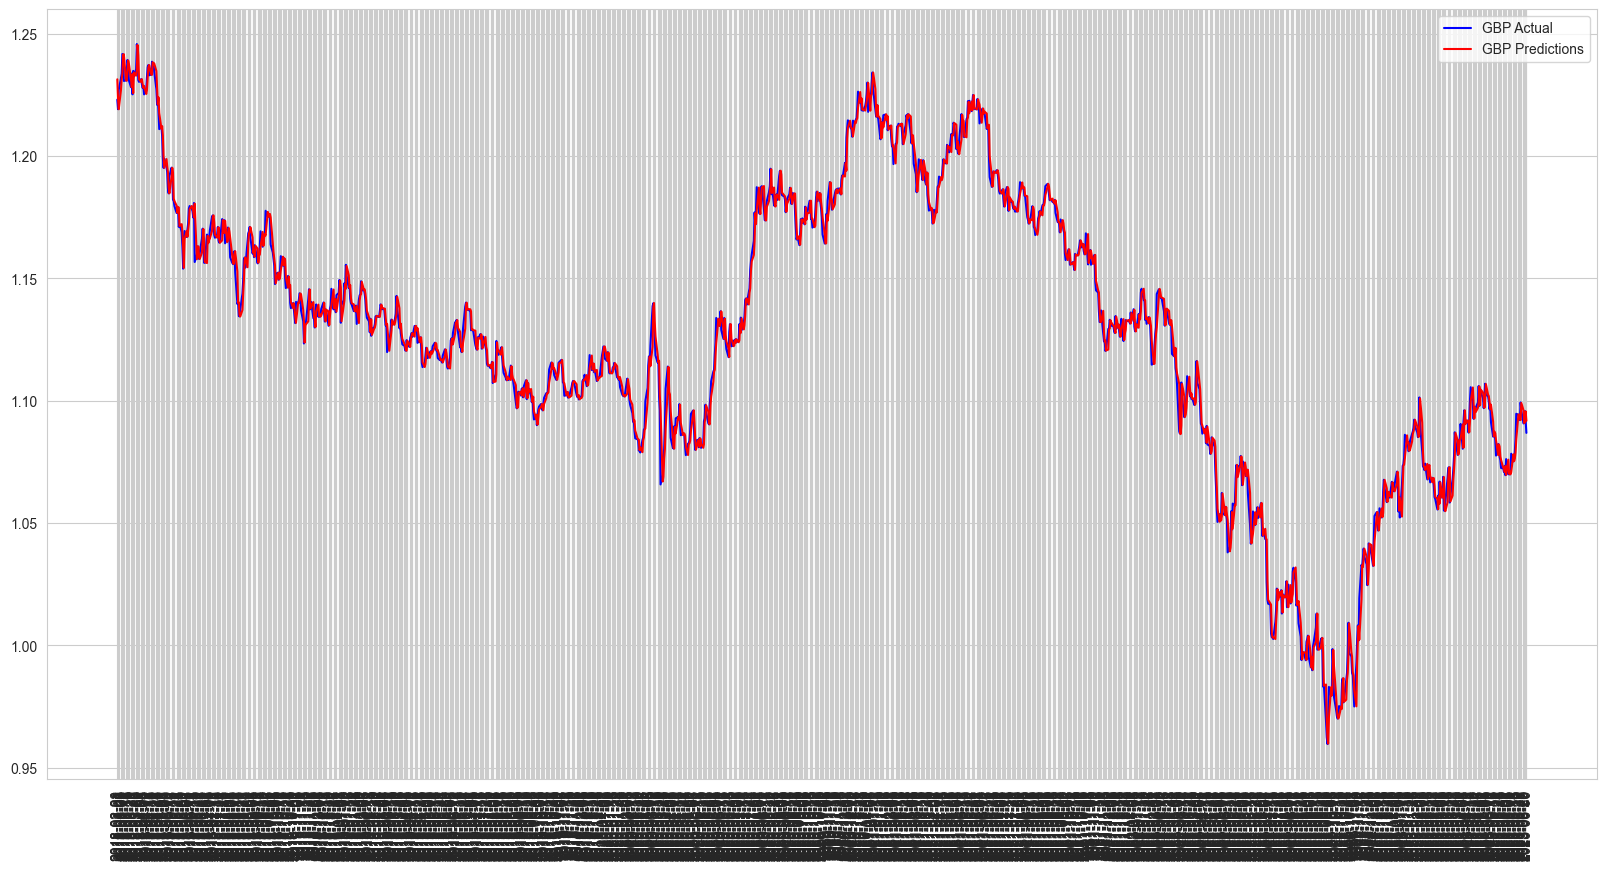

Test RMSE: 0.00508
Test MAE: 0.00385
Total time: 109.04886984825134 seconds


In [25]:
# forward walk validation
start = time.time()

history = [x for x in train]
predictions = list()
len(test)

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1), trend='n')
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print( ' predicted=%f, expected=%f ' % (yhat, obs))

# evaluate forecasts
plt.figure(figsize=(20,10))
plt.plot(test.index, test, color='blue')
plt.plot(test.index, predictions, color='red')
plt.legend(('GBP Actual', 'GBP Predictions'))
plt.xticks(test.index, rotation=90)
plt.grid(True)
plt.show()

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % rmse)

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.5f' % mae)

end = time.time()
print("Total time:", end-start, "seconds")

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/liusirui/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



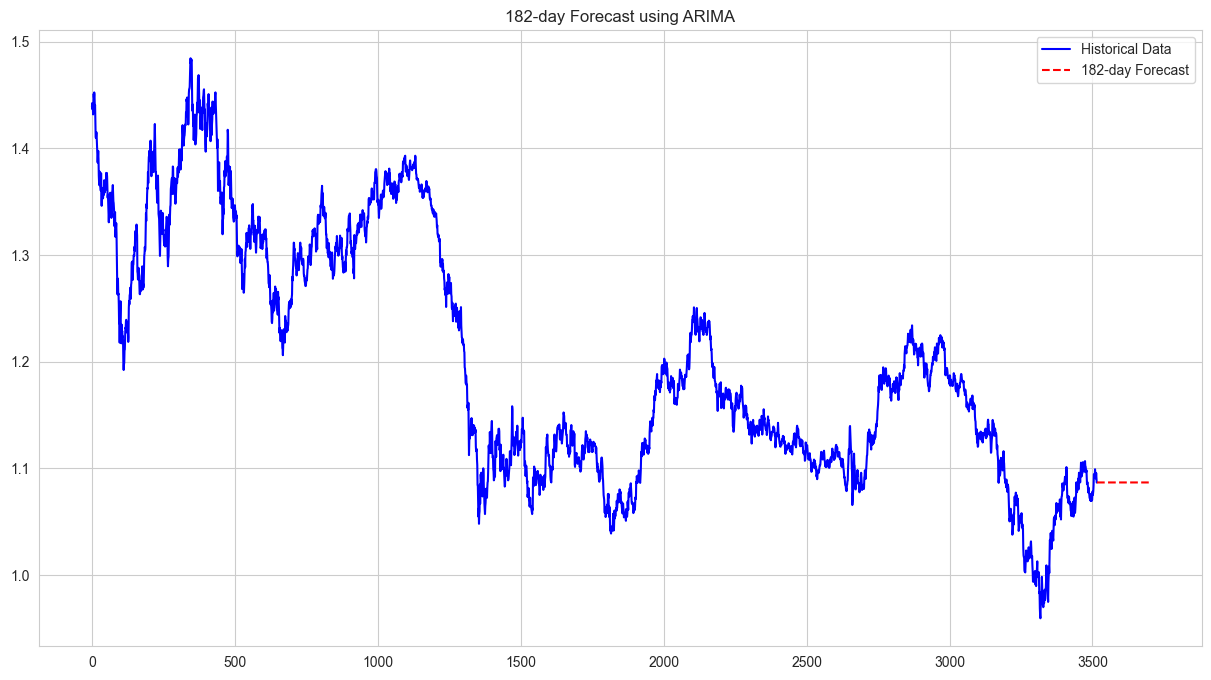

In [32]:
# Fit ARIMA model on full data
final_model = ARIMA(rates, order=(1,1,1), trend='n')
final_model_fit = final_model.fit()

# Forecast
forecast_steps = 365//2
forecast = final_model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(15,8))
plt.plot(np.arange(len(rates)), rates, color='blue', label='Historical Data')
plt.plot(np.arange(len(rates), len(rates) + forecast_steps), forecast, color='red', linestyle='--', label=f'{forecast_steps}-day Forecast')
plt.legend()
plt.title(f'{forecast_steps}-day Forecast using ARIMA')
plt.show()